**Set environment**

In [44]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
library(pheatmap)
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [3]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc")
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [4]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


In [5]:
#txt_fdiry = file.path(FD_RES, "region_coverage_fcc")
#vec = dir(txt_fdiry)
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_REGION = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


## Import data

In [7]:
### init
txt_assay  = "CRISPRi_FlowFISH_K562_Riley_JinWoo"

###
lst = lapply(VEC_TXT_REGION, function(txt_region){
    ### set file directory
    txt_fdiry = file.path(
        FD_RES, "region_coverage_fcc", 
        txt_region, 
        txt_assay, 
        "overlap_score",
        "summary"
    )
    txt_fname = "result.coverage.score.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 941  32

$fcc_astarr_macs_input_union
[1] 1358   32



Chrom,ChromStart,ChromEnd,Region,Mean,Median,AbsMax,Max,Min,Count,⋯,Target_HBG1,Target_HBG2,Target_HBS1L,Target_HDAC6,Target_LMO2,Target_MEF2C,Target_MYB,Target_MYC,Target_NMU,Target_PVT1
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr10,100729094,100729750,chr10:100729094-100729750,-0.07708560,-0.155771,-1.82683,1.63462,-1.82683,84,⋯,NA,NA,NA,NA,0.0534315,-0.453715167,NA,NA,-0.1621681,NA
chr10,100743501,100744571,chr10:100743501-100744571,-0.06350497,-0.101530,-1.97401,1.83498,-1.97401,147,⋯,NA,NA,NA,NA,-0.1640059,0.159182286,NA,NA,-0.1338784,NA
chr10,100745413,100745741,chr10:100745413-100745741,0.08003521,0.111189,2.60601,2.60601,-2.44093,42,⋯,NA,NA,NA,NA,-0.1335742,-0.004853833,NA,NA,0.2845222,NA


In [11]:
### init
txt_assay  = "CRISPRi_FlowFISH_K562_Riley_JinWoo"

###
lst = lapply(VEC_TXT_REGION, function(txt_region){
    ### set file directory
    txt_fdiry = file.path(
        FD_RES, "region_coverage_fcc", 
        txt_region, 
        txt_assay, 
        "overlap_score",
        "summary"
    )
    txt_fname = "result.coverage.score.filtered.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(
        txt_fpath, show_col_types = FALSE,
        col_types = cols(
            .default = col_double(),
            Chrom    = col_character(),
            Region   = col_character()
        )
    )
    return(dat)
})

### assign and show
lst_dat_region_score_filter_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 925  32

$fcc_astarr_macs_input_union
[1] 1330   32



Chrom,ChromStart,ChromEnd,Region,Mean,Median,AbsMax,Max,Min,Count,⋯,Target_HBG1,Target_HBG2,Target_HBS1L,Target_HDAC6,Target_LMO2,Target_MEF2C,Target_MYB,Target_MYC,Target_NMU,Target_PVT1
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11,4092109,4092511,chr11:4092109-4092511,-0.12943640,-0.154327,-2.05570,1.47841,-2.05570,320,⋯,-0.15174300,-0.24259277,-0.047190250,NA,NA,NA,-0.09194356,NA,NA,NA
chr11,4094223,4095304,chr11:4094223-4095304,-0.04849565,-0.045032,-3.02950,2.38441,-3.02950,1030,⋯,-0.06110858,-0.02017601,-0.004131782,NA,NA,NA,0.09460382,NA,NA,NA
chr11,4144721,4147004,chr11:4144721-4147004,-0.07024901,-0.066676,-2.83058,2.67552,-2.83058,1185,⋯,-0.15152373,-0.08632305,-0.003365882,NA,NA,NA,-0.01313274,NA,NA,NA


In [13]:
txt = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_import
dat = lst[[txt]]
dat_region_score_import = dat
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Region,Mean,Median,AbsMax,Max,Min,Count,Mean_Neg,Mean_Pos,Target_CAPRIN1,Target_CAT,Target_CD164,Target_ERP29,Target_FADS1,Target_FADS2,Target_FADS3,Target_FEN1,Target_GATA1,Target_HBE1,Target_HBG1,Target_HBG2,Target_HBS1L,Target_HDAC6,Target_LMO2,Target_MEF2C,Target_MYB,Target_MYC,Target_NMU,Target_PVT1
chr10,100729027,100729908,chr10:100729027-100729908,-0.0858394,-0.1594330,2.14893,2.14893,-1.82683,105,-0.5536601,0.5141915,-0.0414317,-0.2229054,-0.3815898,0.5596685,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.0318141,-0.4688053,NA,NA,-0.0776260,NA
chr10,100731148,100731673,chr10:100731148-100731673,-0.0904755,-0.0654630,-1.82975,1.82954,-1.82975,77,-0.5561907,0.4683827,-0.0352723,-0.0595452,0.0086696,0.0036632,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.1832274,-0.4742773,NA,NA,-0.2597943,NA
chr10,100735439,100736071,chr10:100735439-100736071,-0.0833788,-0.0532875,2.91365,2.91365,-2.46520,70,-0.8810970,0.7143393,-0.1459802,-0.0943544,0.3746315,-0.0374764,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,-0.0494644,-0.4473627,NA,NA,-0.1836452,NA


In [15]:
txt = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_filter_import
dat = lst[[txt]]
dat_region_score_filter_import = dat
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Region,Mean,Median,AbsMax,Max,Min,Count,Mean_Neg,Mean_Pos,Target_CAPRIN1,Target_CAT,Target_CD164,Target_ERP29,Target_FADS1,Target_FADS2,Target_FADS3,Target_FEN1,Target_GATA1,Target_HBE1,Target_HBG1,Target_HBG2,Target_HBS1L,Target_HDAC6,Target_LMO2,Target_MEF2C,Target_MYB,Target_MYC,Target_NMU,Target_PVT1
chr11,4092104,4092566,chr11:4092104-4092566,-0.1340399,-0.159709,-2.05570,1.47841,-2.05570,325,-0.5238011,0.4658268,NA,NA,NA,NA,NA,NA,NA,NA,NA,-0.1163553,-0.1667420,-0.2522359,-0.0414748,NA,NA,NA,-0.0933917,NA,NA,NA
chr11,4094204,4095676,chr11:4094204-4095676,-0.0482194,-0.047314,-3.02950,2.38441,-3.02950,1330,-0.5110948,0.4739041,NA,NA,NA,NA,NA,NA,NA,NA,NA,-0.2284214,-0.0521823,0.0052552,-0.0243134,NA,NA,NA,0.0585651,NA,NA,NA
chr11,4144511,4147030,chr11:4144511-4147030,-0.0702490,-0.066676,-2.83058,2.67552,-2.83058,1185,-0.5219641,0.4566143,NA,NA,NA,NA,NA,NA,NA,NA,NA,-0.0968996,-0.1515237,-0.0863231,-0.0033659,NA,NA,NA,-0.0131327,NA,NA,NA


In [8]:
GENES = c(
    "NMU",
    "MEF2C",
    "CD164",
    "MYB", "HBS1L", "HBG1", "HBG2", "HBE1",
    "PVT1", "MYC",
    "LMO2", "CAPRIN1", "CAT",
    "FADS1", "FADS2", "FADS3", "FEN1",
    "ERP29",
    "GATA1", "HDAC6"
)

CHROMS = paste0("chr", c(1:22, "X", "Y"))

In [32]:
dat = dat_region_score_import
dat = dat %>% dplyr::select(Chrom:Region, starts_with("Target"))
head(dat, 3)

Chrom,ChromStart,ChromEnd,Region,Target_CAPRIN1,Target_CAT,Target_CD164,Target_ERP29,Target_FADS1,Target_FADS2,⋯,Target_HBG1,Target_HBG2,Target_HBS1L,Target_HDAC6,Target_LMO2,Target_MEF2C,Target_MYB,Target_MYC,Target_NMU,Target_PVT1
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr10,100729027,100729908,chr10:100729027-100729908,-0.04143173,-0.22290540,-0.381589800,0.559668467,NA,NA,⋯,NA,NA,NA,NA,0.03181413,-0.4688053,NA,NA,-0.0776260,NA
chr10,100731148,100731673,chr10:100731148-100731673,-0.03527227,-0.05954518,0.008669636,0.003663182,NA,NA,⋯,NA,NA,NA,NA,0.18322736,-0.4742773,NA,NA,-0.2597943,NA
chr10,100735439,100736071,chr10:100735439-100736071,-0.14598020,-0.09435440,0.374631500,-0.037476400,NA,NA,⋯,NA,NA,NA,NA,-0.04946440,-0.4473627,NA,NA,-0.1836452,NA


In [33]:
dat = dat_region_score_filter_import
dat = dat %>% dplyr::select(Chrom:Region, starts_with("Target"))
head(dat, 3)

Chrom,ChromStart,ChromEnd,Region,Target_CAPRIN1,Target_CAT,Target_CD164,Target_ERP29,Target_FADS1,Target_FADS2,⋯,Target_HBG1,Target_HBG2,Target_HBS1L,Target_HDAC6,Target_LMO2,Target_MEF2C,Target_MYB,Target_MYC,Target_NMU,Target_PVT1
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11,4092104,4092566,chr11:4092104-4092566,NA,NA,NA,NA,NA,NA,⋯,-0.16674203,-0.252235877,-0.041474754,NA,NA,NA,-0.09339174,NA,NA,NA
chr11,4094204,4095676,chr11:4094204-4095676,NA,NA,NA,NA,NA,NA,⋯,-0.05218232,0.005255162,-0.024313406,NA,NA,NA,0.05856510,NA,NA,NA
chr11,4144511,4147030,chr11:4144511-4147030,NA,NA,NA,NA,NA,NA,⋯,-0.15152373,-0.086323055,-0.003365882,NA,NA,NA,-0.01313274,NA,NA,NA


In [38]:
dat = dat = dat_region_score_import
dat = dat %>% dplyr::select(Chrom:Region, starts_with("Target"))

vec = dat$Region
print(length(vec))
vec = unique(vec)
print(length(vec))

[1] 1358
[1] 1358


In [42]:
dat = dat = dat_region_score_import
dat = dat %>% dplyr::select(Chrom:Region, starts_with("Target"))

dat$Chrom = factor(dat$Chrom, levels=CHROMS)
dat = dat %>% dplyr::arrange(Chrom, ChromStart, ChromEnd) %>% dplyr::distinct()

### split into score matrix and annotatoin
dat_annot = dat %>% dplyr::select(Region, Chrom)  %>% column_to_rownames(var = "Region")
dat_score = dat %>% dplyr::select(-Chrom, -ChromStart, -ChromEnd) %>% column_to_rownames(var = "Region")


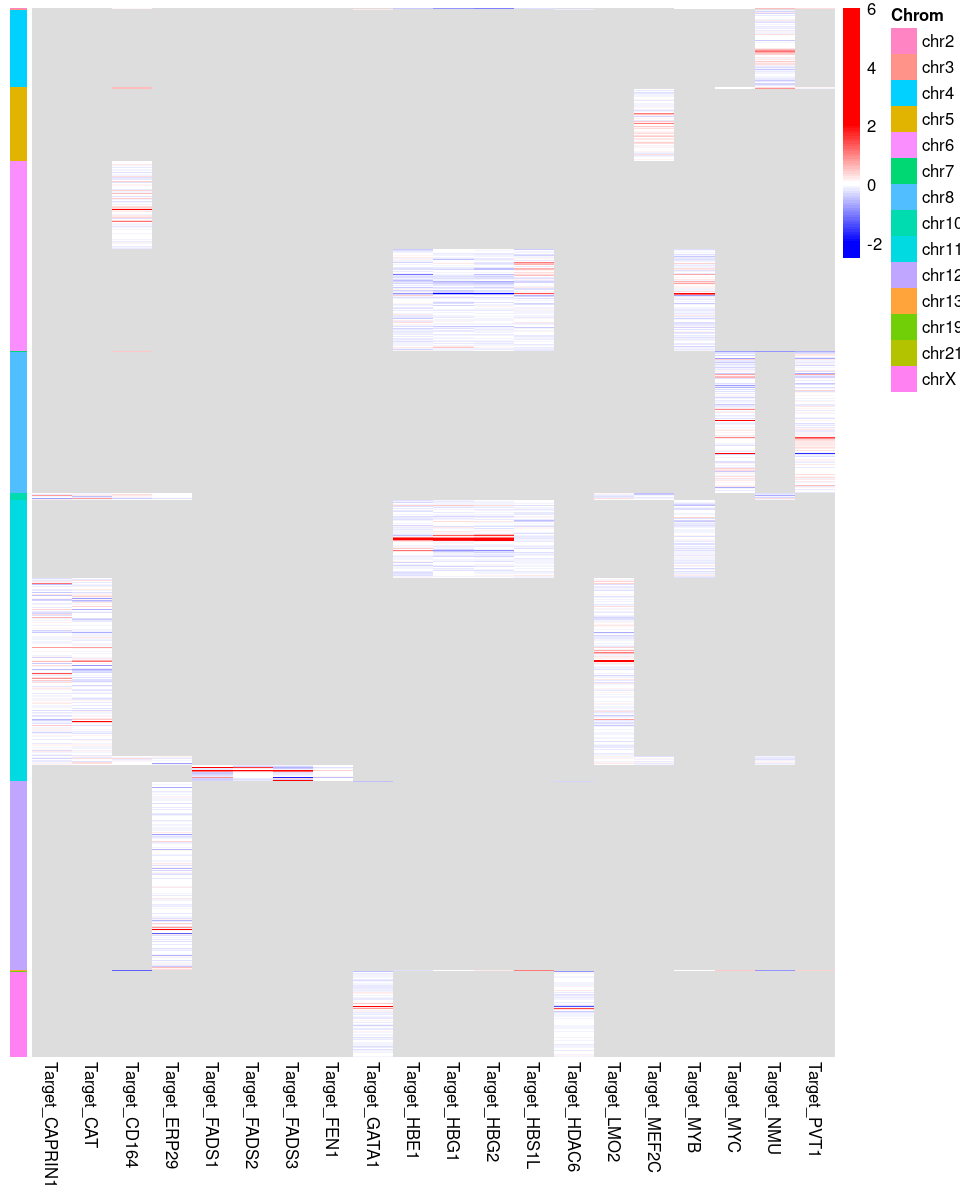

In [45]:
###
paletteLength = 50
mat  = dat_score
bmin = -2.5
bmax =  6
xmin = -2 # min(mat)
xmax =  2 # max(mat)
nmin = ceiling((paletteLength-1)/2)
nmax = floor(  (paletteLength-1)/2)

myColor = c(
    "blue",
    colorRampPalette(c("blue", "white"))(nmin),
    "white",
    colorRampPalette(c("white", "red"))(nmax),
    "red"
)

myBreaks = c(
    bmin,
    seq(xmin, xmin/paletteLength, length.out=nmin),
    0,
    seq(xmax/paletteLength, xmax, length.out=nmax),
    bmax
)

options(repr.plot.height=10, repr.plot.width=8)
pheatmap(mat,
         cluster_row  = FALSE,
         cluster_cols = FALSE,
         show_rownames = FALSE,
         annotation_names_row = FALSE,
         annotation_row = dat_annot,
         color=myColor, 
         breaks=myBreaks)

In [28]:
dat = dat_region_score_import
dat = dat %>% dplyr::select(Region, starts_with("Target"))
dat = dat %>% 
    tidyr::gather(Sample, Value, -Region) %>% 
    tidyr::separate(Sample, c("X", "Gene"), sep = "_") %>%
    tidyr::separate(Region, c("Chrom", "Start", "End"), remove = FALSE) %>%
    na.omit

dat$Chrom = factor(dat$Chrom, levels=CHROMS)
dat = dat %>% dplyr::arrange(Chrom, Start, End) %>% dplyr::distinct()

### split into score matrix and annotatoin
#dat_annot = dat %>% dplyr::select(Region, Chrom)        %>% column_to_rownames(var = "Region")
#dat_score = dat %>% dplyr::select(-Chrom, -Start, -End) %>% column_to_rownames(var = "Region")

print(dim(dat))
head(dat)

[1] 3279    7


Region,Chrom,Start,End,X,Gene,Value
<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>
chr2:129361843-129362257,chr2,129361843,129362257,Target,CD164,0.134735
chr2:129361843-129362257,chr2,129361843,129362257,Target,HBE1,-0.401875
chr2:129361843-129362257,chr2,129361843,129362257,Target,HBG1,-0.794888
chr2:129361843-129362257,chr2,129361843,129362257,Target,HBG2,-0.986619
chr2:129361843-129362257,chr2,129361843,129362257,Target,HBS1L,-0.213830
chr2:129361843-129362257,chr2,129361843,129362257,Target,MYB,0.099261


In [ ]:
dat$Chrom = factor(dat$Chrom, levels=CHROMS)
dat = dat %>% dplyr::arrange(Chrom, Start, End)

### split into score matrix and annotatoin
dat_annot = dat %>% dplyr::select(Peak, Chrom)          %>% column_to_rownames(var = "Peak")
dat_score = dat %>% dplyr::select(-Chrom, -Start, -End) %>% column_to_rownames(var = "Peak")

In [ ]:
dat = dat_region_score_import

###
dat = dat %>% 
    dplyr::select(Peak, Gene, Mean) %>%
    tidyr::spread(Gene, Mean) %>% 
    dplyr::mutate(across(where(is.numeric), ~replace_na(.,0))) %>%
    tidyr::separate(Peak, c("Chrom", "Start", "End"), remove = FALSE) %>%
    dplyr::select(Peak, Chrom, Start, End, !!genes)

### sort by location
dat$Chrom = factor(dat$Chrom, levels=CHROMS)
dat = dat %>% dplyr::arrange(Chrom, Start, End)

### split into score matrix and annotatoin
dat_annot = dat %>% dplyr::select(Peak, Chrom)          %>% column_to_rownames(var = "Peak")
dat_score = dat %>% dplyr::select(-Chrom, -Start, -End) %>% column_to_rownames(var = "Peak")


head(dat)